In [16]:
import scipy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pygmt
import math

robbins = pd.read_csv("lunar_crater_database_robbins_2018.csv")
coords_LL = robbins[['LON_CIRC_IMG','LAT_CIRC_IMG']]

# translate into cylindrical equal area projection
def translate_lat(latitude_i):
    return np.sin(np.deg2rad(latitude_i))
def translate_lon(longitude_i):
    return np.pi * longitude_i / 180
coords_C=pd.DataFrame()

coords_C.loc[:, 'LON_CIRC_IMG'] = coords_LL.loc[:, 'LON_CIRC_IMG'].apply(translate_lon)
coords_C.loc[:, 'LAT_CIRC_IMG'] = coords_LL.loc[:, 'LAT_CIRC_IMG'].apply(translate_lat)

coords_C_num = coords_C.to_numpy()

x = coords_C_num[:,0]
y = coords_C_num[:,1]

nbins=1000
k = scipy.stats.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
%store xi yi zi

Stored 'xi' (ndarray)
Stored 'yi' (ndarray)
Stored 'zi' (ndarray)


In [17]:
df_xi = pd.DataFrame(xi)
df_xi.to_csv('data/xi.csv')
df_yi = pd.DataFrame(yi)
df_yi.to_csv('data/yi.csv')
df_zi = pd.DataFrame(zi)
df_zi.to_csv('data/zi.csv')

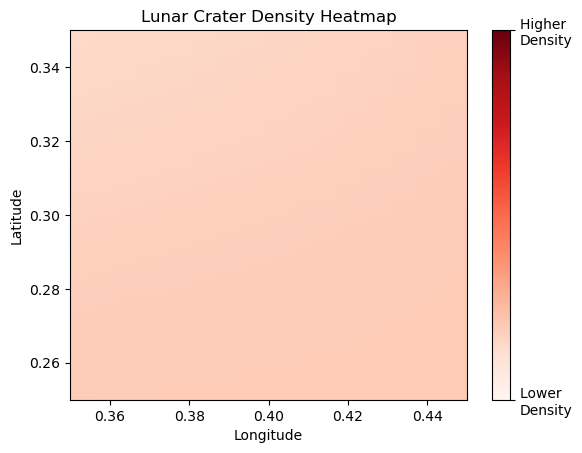

In [23]:
from matplotlib.patches import Rectangle

pi = np.pi

ax = plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Reds, vmin=0, vmax=.15)
cbar = plt.colorbar(ticks=[0, 0.15]) # COLORBAR
cbar.ax.set_yticklabels(['Lower \nDensity', 'Higher \nDensity'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lunar Crater Density Heatmap')
#plt.xticks([0,pi/3,2*pi/3,pi,4*pi/3,5*pi/3,2*pi], ['-180°','-120°','-60°','0°','60°','120°','180°'])
#plt.yticks([-1,-0.866,-.5,0,.5,0.866,1], ['-90°','60°','-30°','0°','30°','60°','90°',])
plt.xlim(.35,.45)
plt.ylim(.25,.35)

plt.show()